In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
import json
from toolz.curried import get
from toolz import compose
import pandas as pd

In [15]:
def hx(s: str) -> int:
    return int(s[2:], 16)

def wad(x: int) -> float:
    return x / 1e18

def map_cols(df, f, *cols):
    cols = list(cols)
    df[cols] = df[cols].map(f)

In [101]:
with open('../data/main_data.json', 'r') as f:
    history = pd.DataFrame(json.load(f))

map_cols(history, compose(wad, hx), 'max_main_flow', 'max_elastic_deplete', 'rel_main_buffer', 'rel_elastic')
map_cols(history, hx, 'last_updated_at')


with open('../data/exceeds.json', 'r') as f:
    hits = pd.DataFrame(json.load(f))

map_cols(hits, hx, 'time')

history

,time,max_main_flow,max_elastic_deplete,tvl,last_updated_at,rel_main_buffer,rel_elastic
0,2,0.000500,0.000000,1.000000,0,0.000000,0.000000
1,3,0.000750,0.000234,1.000234,3,0.014996,0.000234
2,4,0.001000,0.000223,1.000234,3,0.014996,0.000234
3,5,0.001250,0.000211,1.000234,3,0.014996,0.000234
4,6,0.001500,0.000199,1.000234,3,0.014996,0.000234
...,...,...,...,...,...,...,...
9995,9997,0.028381,0.008412,1.312036,9997,0.432628,0.006411
9996,9998,0.028709,0.012098,1.316143,9998,0.436262,0.009192
9997,9999,0.029038,0.017297,1.321946,9999,0.439325,0.013084
9998,10000,0.029369,0.021644,1.327158,10000,0.442580,0.016308


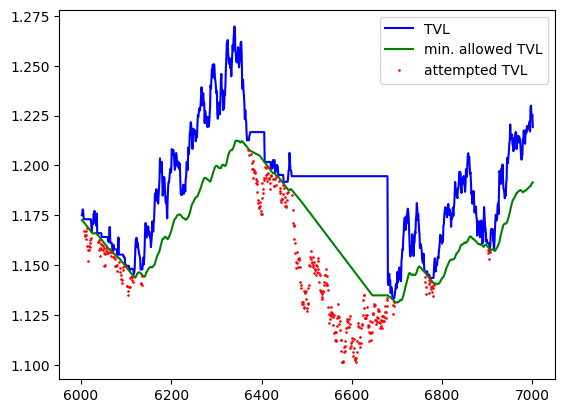

In [102]:
from toolz.curried import get
from toolz import compose

r_his = history[6000:7000]
r_hits = hits[hits['time'].isin(r_his['time'])]

plt.plot(r_his['time'], r_his['tvl'], 'b', label='TVL')
plt.plot(r_his['time'], r_his['tvl'] - r_his['max_main_flow'] - r_his['max_elastic_deplete'], 'g', label='min. allowed TVL')
plt.plot(r_hits['time'], r_hits['target_val'], '.r', markersize=1.8, label='attempted TVL')
plt.legend()
plt.savefig('plot.png')

In [ ]:
k